In [85]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

2023-11-06 19:07:26.042348: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 19:07:26.261005: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 19:07:27.039804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 19:07:27.039860: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 19:07:27.045526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [86]:
data = pd.read_excel("/home/phuongthao/cloud/cpi.xlsx")
data

,date,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Tháng 1,103.8,100.9,100.8,101.6,101.7,100.4,100.3,101.1,100.9,...,101.00,101.25,100.69,99.80,100.00,100.46,100.51,100.10,101.23,100.06
1,Tháng 2,103.4,102.5,101.8,102.2,101.9,101.6,100.4,102.2,102.2,...,101.37,101.32,100.55,99.95,100.42,100.23,100.73,100.80,99.83,101.52
2,Tháng 3,100.2,100.8,99.5,99.2,99.3,98.9,99.3,99.2,99.4,...,100.16,99.81,99.56,100.15,100.57,100.21,99.73,99.79,99.28,99.73
3,Tháng 4,101.0,100.1,99.4,101.6,99.4,99.3,99.5,100.0,100.0,...,100.05,100.02,100.08,100.14,100.33,100.00,100.08,100.31,98.46,99.96
4,Tháng 5,101.8,99.5,99.5,101.4,99.6,99.4,99.8,100.3,99.9,...,100.18,99.94,100.20,100.16,100.54,99.47,100.55,100.49,99.97,100.16
5,Tháng 6,100.8,99.5,100.1,100.0,99.7,99.5,100.0,100.1,99.7,...,99.74,100.05,100.30,100.35,100.46,99.83,100.61,99.91,100.66,100.19
6,Tháng 7,100.0,99.3,100.2,99.5,99.6,99.4,99.8,99.9,99.7,...,99.71,100.27,100.23,100.13,100.13,100.11,99.91,100.18,100.40,100.62
7,Tháng 8,100.3,99.6,100.1,101.1,99.6,100.1,100.0,100.1,99.9,...,100.63,100.83,100.22,99.93,100.10,100.92,100.45,100.28,100.07,100.25
8,Tháng 9,100.5,100.3,100.6,101.0,99.4,99.8,100.5,100.2,100.1,...,102.20,101.06,100.40,99.79,100.54,100.59,100.59,100.32,100.12,99.38
9,Tháng 10,100.1,100.1,100.3,100.3,99.0,100.1,100.0,100.3,99.8,...,100.85,100.49,100.11,100.11,100.83,100.41,100.33,100.59,100.09,99.80


## SGD

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo và huấn luyện mô hình SGDRegressor
model = SGDRegressor(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 50.723241503429854


In [88]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.089940,2.089940
1,119.89,104.952475,14.937525
2,109.50,105.062447,4.437553
3,104.74,104.732532,0.007468
4,112.70,105.309882,7.390118


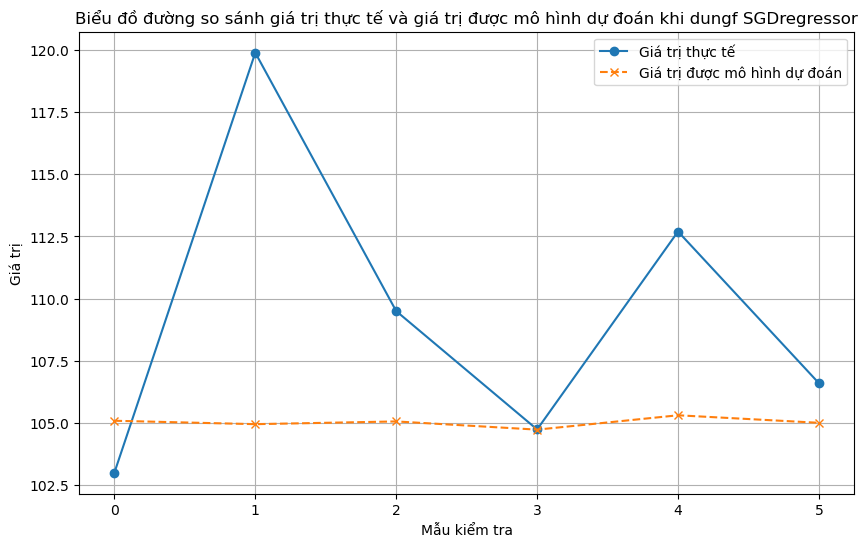

In [89]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Giá trị thực tế', marker='o', linestyle='-')
plt.plot(y_pred, label='Giá trị được mô hình dự đoán', marker='x', linestyle='--')
plt.xlabel('Mẫu kiểm tra')
plt.ylabel('Giá trị')
plt.title('Biểu đồ đường so sánh giá trị thực tế và giá trị được mô hình dự đoán khi dungf SGDregressor')
plt.legend()
plt.grid(True)
plt.show()


## -------------------------------------------------------------------------------------------------------------------

##  learning_rate='adaptive' để sử dụng phương pháp Adagrad với SGDRegressor

In [90]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo và huấn luyện mô hình với Adagrad
model = SGDRegressor(max_iter=10000, random_state=42, eta0=0.01, learning_rate='adaptive', penalty=None)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 49.29391384394993


In [91]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test1,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred1,
                       'Sự khác biệt': abs(y_pred1 - y_test1)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.255955,2.255955
1,119.89,105.111149,14.778851
2,109.50,105.226994,4.273006
3,104.74,104.879458,0.139458
4,112.70,105.487646,7.212354


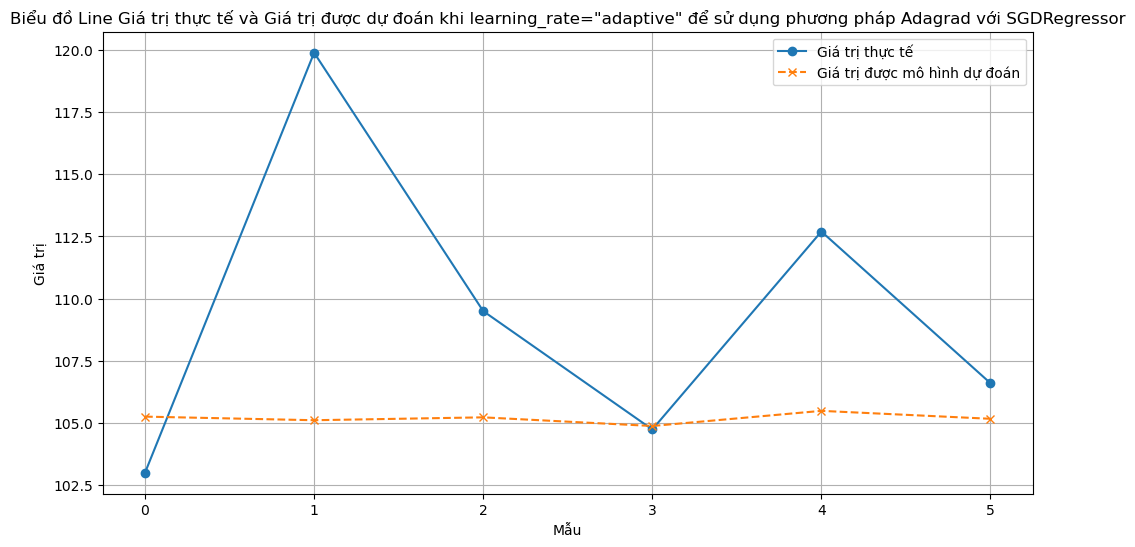

In [92]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ line cho giá trị thực tế và giá trị được mô hình dự đoán
plt.figure(figsize=(12, 6))
plt.plot(y_test1, label='Giá trị thực tế', marker='o')
plt.plot(y_pred1, label='Giá trị được mô hình dự đoán', linestyle='--', marker='x')

# Đặt tiêu đề và nhãn cho các trục
plt.title('Biểu đồ Line Giá trị thực tế và Giá trị được dự đoán khi learning_rate="adaptive" để sử dụng phương pháp Adagrad với SGDRegressor')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')

# Đặt chú thích và hiển thị nó
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


## -------------------------------------------------------------------------------------------------------------------

##  sử dụng learning_rate="invscaling" để mô phỏng hành vi của thuật toán Adamax trong SGDRegressor

In [93]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train2 = X_train2.values.reshape(-1, 1)
X_test2 = X_test2.values.reshape(-1, 1)
scaler2 = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Tạo và huấn luyện mô hình với SGDRegressor và thuật toán Adamax
def adamax_learning_rate(eta0, power_t, t):
    return eta0 / (1 + t)

model = SGDRegressor(max_iter=10000, random_state=42, learning_rate="invscaling", eta0=0.01, power_t=0.25, penalty=None)
model.fit(X_train2, y_train2)

# Dự đoán trên tập kiểm tra
y_pred2 = model.predict(X_test2)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test2, y_pred2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 50.72313280293435


In [94]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test2,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred2,
                       'Sự khác biệt': abs(y_pred2 - y_test2)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.089954,2.089954
1,119.89,104.952477,14.937523
2,109.50,105.062459,4.437541
3,104.74,104.732514,0.007486
4,112.70,105.309918,7.390082


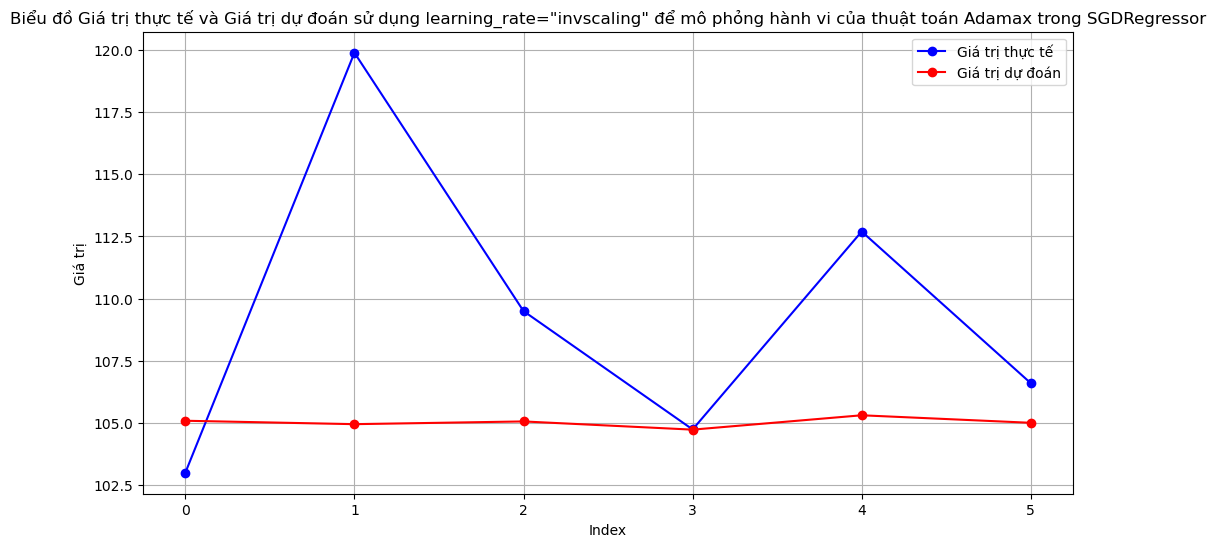

In [95]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ line cho giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['Giá trị thực tế (y_test)'], label='Giá trị thực tế', marker='o', linestyle='-', color='blue')
plt.plot(result.index, result['Giá trị được mô hình dự đoán (y_pred)'], label='Giá trị dự đoán', marker='o', linestyle='-', color='red')
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Giá trị thực tế và Giá trị dự đoán sử dụng learning_rate="invscaling" để mô phỏng hành vi của thuật toán Adamax trong SGDRegressor')
plt.legend()
plt.grid(True)
plt.show()


## -------------------------------------------------------------------------------------------------------------------

## RMSProp kết hợp với Adam thành (Nesterov Adam(Nadam)): sử dụng thuật toán adam, một phương pháp tối ưu hóa sử dụng RMSProp và là một phương pháp học sâu, do đó nó thích hợp cho các nhiệm vụ phức tạp hơn. 

In [96]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train3 = X_train3.values.reshape(-1, 1)
X_test3 = X_test3.values.reshape(-1, 1)
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

# Tạo và huấn luyện mô hình với MLPRegressor và thuật toán RMSProp
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=10000, solver='adam', learning_rate='adaptive',
                    learning_rate_init=0.01, alpha=0.9)
model.fit(X_train3, y_train3)

# Dự đoán trên tập kiểm tra
y_pred3 = model.predict(X_test3)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test3, y_pred3)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 47.60677976570319


In [97]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test3,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred3,
                       'Sự khác biệt': abs(y_pred3 - y_test3)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.461864,2.461864
1,119.89,105.322361,14.567639
2,109.50,105.433963,4.066037
3,104.74,105.099156,0.359156
4,112.70,105.685069,7.014931


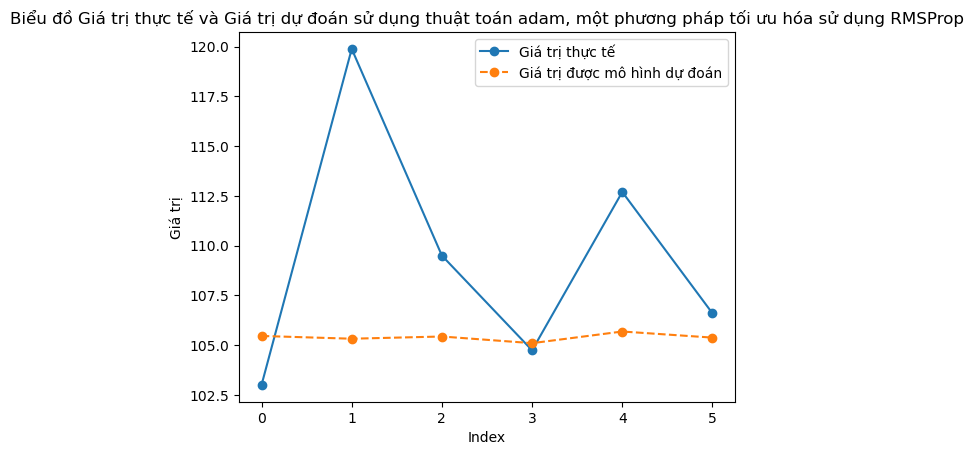

In [98]:
import matplotlib.pyplot as plt

# Lấy các giá trị từ result DataFrame
y_test = result['Giá trị thực tế (y_test)']
y_pred = result['Giá trị được mô hình dự đoán (y_pred)']

# Tạo biểu đồ line
plt.plot(y_test, label='Giá trị thực tế', marker='o', linestyle='-')
plt.plot(y_pred, label='Giá trị được mô hình dự đoán', marker='o', linestyle='--')

# Đặt tên cho các trục
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Giá trị thực tế và Giá trị dự đoán sử dụng thuật toán adam, một phương pháp tối ưu hóa sử dụng RMSProp')

# Đặt chú thích cho biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.show()


## RMSProp kết hợp với Adam thành (Nesterov Adam(Nadam)) cho ra sai số MSE nhỏ nhất

## -------------------------------------------------------------------------------------------------------------------

## Chỉ có thuật toán Adam cho ra sai số MSE lớn hơn 
## sai số lớn hơn khi kết hợp Adam với RMSProp 

In [99]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train4 = X_train4.values.reshape(-1, 1)
X_test4 = X_test4.values.reshape(-1, 1)
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

# Tạo và huấn luyện mô hình với MLPRegressor và thuật toán Adam
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=10000, solver='adam', learning_rate='adaptive',
                    learning_rate_init=0.01, alpha=0.9)
model.fit(X_train4, y_train4)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test4)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test4, y_pred4)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 49.110807966594564


In [100]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test4,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred4,
                       'Sự khác biệt': abs(y_pred4 - y_test4)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.278048,2.278048
1,119.89,105.140774,14.749226
2,109.50,105.250594,4.249406
3,104.74,104.921134,0.181134
4,112.70,105.497688,7.202312


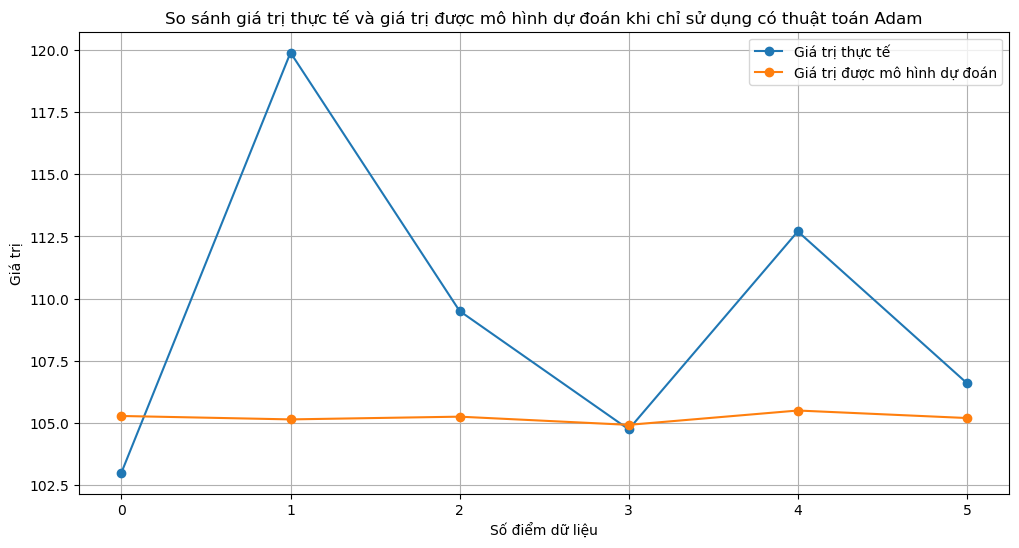

In [101]:
import matplotlib.pyplot as plt

# Dữ liệu
x = range(len(y_test4))  # Điểm dữ liệu
y_test = y_test4
y_pred = y_pred4

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(x, y_test, label='Giá trị thực tế', marker='o', linestyle='-')
plt.plot(x, y_pred, label='Giá trị được mô hình dự đoán', marker='o', linestyle='-')
plt.xlabel('Số điểm dữ liệu')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực tế và giá trị được mô hình dự đoán khi chỉ sử dụng có thuật toán Adam')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
import tensorflow as tf

# Define custom LSTM layer
class CustomLSTM(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomLSTM, self).__init__()
        self.units = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W_i = self.add_weight("W_i", shape=(input_dim, self.units))
        self.W_f = self.add_weight("W_f", shape=(input_dim, self.units))
        self.W_c = self.add_weight("W_c", shape=(input_dim, self.units))
        self.W_o = self.add_weight("W_o", shape=(input_dim, self.units))

        self.W_h = self.add_weight("W_h", shape=(self.units, self.units))

        self.b_i = self.add_weight("b_i", shape=(self.units,))
        self.b_f = self.add_weight("b_f", shape=(self.units,))
        self.b_c = self.add_weight("b_c", shape=(self.units,))
        self.b_o = self.add_weight("b_o", shape=(self.units,))

    def call(self, inputs, initial_state):
        h_prev, c_prev = initial_state
        i = tf.sigmoid(tf.matmul(inputs, self.W_i) + tf.matmul(h_prev, self.W_h) + self.b_i)
        f = tf.sigmoid(tf.matmul(inputs, self.W_f) + tf.matmul(h_prev, self.W_h) + self.b_f)
        c = f * c_prev + i * tf.tanh(tf.matmul(inputs, self.W_c) + tf.matmul(h_prev, self.W_h) + self.b_c)
        o = tf.sigmoid(tf.matmul(inputs, self.W_o) + tf.matmul(h_prev, self.W_h) + self.b_o)
        h = o * tf.tanh(c)
        return h, c

# Define the custom LSTM model
class CustomLSTMModel(tf.keras.Model):
    def __init__(self, units):
        super(CustomLSTMModel, self).__init__()
        self.lstm = CustomLSTM(units)
        self.dense = tf.keras.layers.Dense(1)  # Output layer

    def call(self, inputs):
        h, c = tf.zeros((inputs.shape[0], self.lstm.units)), tf.zeros((inputs.shape[0], self.lstm.units))
        for t in range(inputs.shape[1]):
            h, c = self.lstm(inputs[:, t, :], (h, c))
        output = self.dense(h)
        return output

# Prepare the data (X_train, y_train) and compile the model
# Then, train the model using X_train, y_train

# Evaluate the model


## ----------------------------------------------------------------------------------------------------

## RMSProp

In [110]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("/home/phuongthao/cloud/cpi.csv")

# Chuyển cột "date" thành cột chỉ số CPI
data = data.T
data.columns = data.iloc[0]
data = data[1:]

# Chuyển cột chỉ số CPI và cột date thành dạng số
data = data.apply(pd.to_numeric, errors='coerce')

# Tạo mảng đầu vào (X) và đầu ra (y)
X = data.index  # Sử dụng index của DataFrame làm đầu vào X
y = data["Tháng 12 năm báo cáo so với tháng 12 năm trước"].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train5 = X_train5.values.reshape(-1, 1)
X_test5 = X_test5.values.reshape(-1, 1)
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

# Tạo và huấn luyện mô hình với MLPRegressor và thuật toán RMSProp
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=10000, solver='adam', learning_rate='adaptive',
                    learning_rate_init=0.01, alpha=0.9)
model.fit(X_train5, y_train5)

# Dự đoán trên tập kiểm tra
y_pred5 = model.predict(X_test5)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test5, y_pred5)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 49.263068371625614


In [111]:
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test5,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred5,
                       'Sự khác biệt': abs(y_pred5 - y_test5)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
0,103.00,105.260033,2.260033
1,119.89,105.122138,14.767862
2,109.50,105.232454,4.267546
3,104.74,104.901506,0.161506
4,112.70,105.480665,7.219335


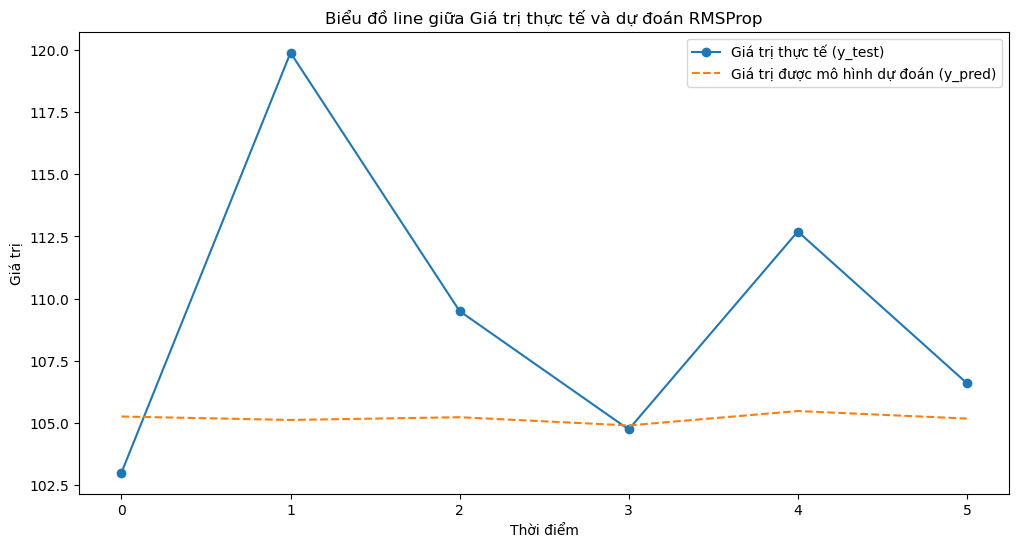

In [113]:
import matplotlib.pyplot as plt

# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ line cho dữ liệu thực tế (y_test) và dự đoán (y_pred)
plt.plot(y_test5, label='Giá trị thực tế (y_test)', marker='o')
plt.plot(y_pred5, label='Giá trị được mô hình dự đoán (y_pred)', linestyle='--')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ line giữa Giá trị thực tế và dự đoán RMSProp')
plt.xlabel('Thời điểm')
plt.ylabel('Giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
